<b>Data Storytelling</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned.csv')

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

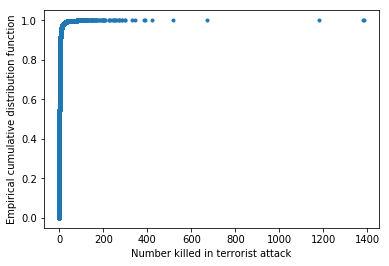

In [5]:
x, y = ecdf(df['nkill'])

_ = plt.plot(x,y, linestyle = 'none', marker = '.')
_ = plt.xlabel('Number killed in terrorist attack')
_ = plt.ylabel('Empirical cumulative distribution function')
plt.show()

This ECDF is not very informative, due to the rightward skew of the data. Next, I show the success rate grouped by region:

In [31]:
region_dict = {1: 'North America', 2: 'Central America', 3: 'South America', 4: 'East Asia', 5: 'SE Asia', 6: 'South Asia', 
7: 'Central Asia', 8: 'West Europe',9: 'East Europe',10: 'ME and North Africa', 
11: 'Sub-Saharan Africa', 12: 'Oceania'}

df['region_name'] = df['region'].replace(region_dict)

In [32]:
region_success_counts = df.groupby(['region_name'])['success'].sum()

region_counts = df.groupby(['region_name'])['success'].count()

In [55]:
region_success_ratio = region_success_counts.divide(region_counts)

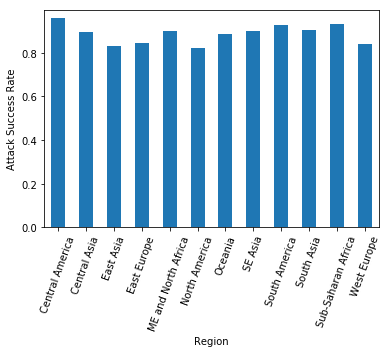

In [45]:
_ = region_success_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Success Rate')
plt.margins(0.04)
plt.show()

There ratios are clustered pretty closely together, so let's see if there is a more interesting trend in the proportion of attacks that result in fatalities

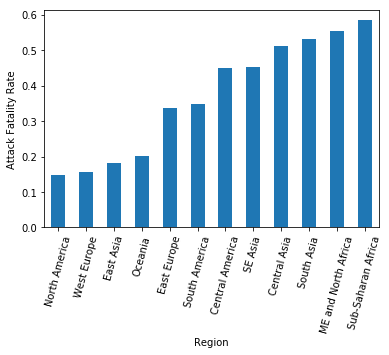

In [78]:
df['fatal'] = df['nkill'] > 0
region_fatal_counts = df.groupby(['region_name'])['fatal'].sum()
region_fatal_ratio = region_fatal_counts.divide(region_counts)
region_fatal_ratio = region_fatal_ratio.sort_values()

_ = region_fatal_ratio.plot(kind='bar', rot = 75)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

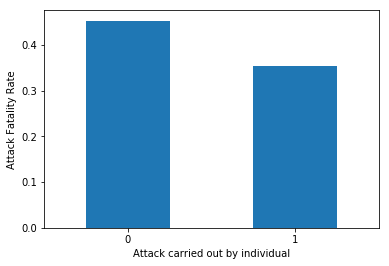

In [62]:
individual_counts = df.groupby(['individual'])['fatal'].count()
individual_fatal_counts = df.groupby(['individual'])['fatal'].sum()
individual_fatal_ratio = individual_fatal_counts.divide(individual_counts)

_ = individual_fatal_ratio.plot(kind='bar', rot = 0)
_ = plt.xlabel('Attack carried out by individual')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

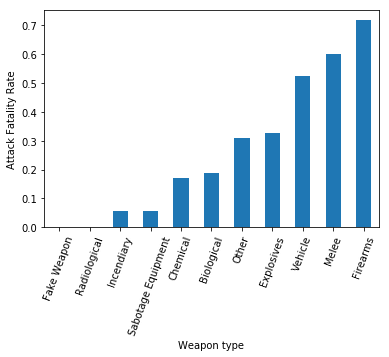

In [77]:
weapon_dict = {1:'Biological',2:'Chemical',3:'Radiological',
            4:'Nuclear',5:'Firearms',6:'Explosives',
            7:'Fake Weapon', 8:'Incendiary', 9:'Melee',
            10:'Vehicle',11:'Sabotage Equipment', 12:'Other'}

df['weapname1'] = df['weaptype1'].replace(weapon_dict)

weap_counts = df.groupby(['weapname1'])['fatal'].count()
weap_fatal_counts = df.groupby(['weapname1'])['fatal'].sum()
weap_fatal_ratio = weap_fatal_counts.divide(weap_counts)
weap_fatal_ratio = weap_fatal_ratio.sort_values()

_ = weap_fatal_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Weapon type')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

In [65]:
print(weap_counts)

weaptype1
1.0        32
2.0       251
3.0        13
5.0     44004
6.0     65312
7.0        32
8.0      9473
9.0      2934
10.0      107
11.0      121
12.0       97
Name: fatal, dtype: int64


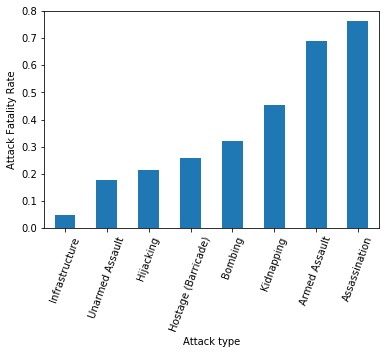

In [72]:
type_dict = {1:'Assassination', 2:'Armed Assault',
            3:'Bombing', 4:'Hijacking', 5:'Hostage (Barricade)',
             6:'Kidnapping', 7:'Infrastructure', 8:'Unarmed Assault'}

df['typename1'] = df['attacktype1'].replace(type_dict)

type_counts = df.groupby(['typename1'])['fatal'].count()
type_fatal_counts = df.groupby(['typename1'])['fatal'].sum()
type_fatal_ratio = type_fatal_counts.divide(type_counts)

type_fatal_ratio = type_fatal_ratio.sort_values()

_ = type_fatal_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Attack type')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()